In [1]:
import pandas as pd
import re

In [2]:
df= pd.read_csv('./data/sentence_data.csv')

# Preprocessing

1) Drop all Nan row

In [3]:
#drop all Nan
df.dropna(inplace= True)
df

city         country  \
0                      Vienna         Austria   
1                      Vienna         Austria   
2              City of London  United Kingdom   
3              City of London  United Kingdom   
4          West End of London  United Kingdom   
...                       ...             ...   
968664  el Besòs i el Maresme           Spain   
968665                 Vienna         Austria   
968666              Amsterdam     Netherlands   
968667                 Vienna         Austria   
968668       Levallois-Perret          France   

                                                   Review  \
0        Location was good Have stayed before I e 9yrs...   
1        Breakfast options are limited Personally i wo...   
2        The room was a great size for a city hotel Th...   
3        The room was a great size for a city hotel Th...   
4        The room was small and the bathroom was minut...   
...                                                   ...   
968664   Reception area very shabby Walls in bedroom w...   
968665   I was informed when I checked in that I would...   
968666   Could hear other people shutting doors but di...   
968667   Hotel is showing signs of wear Room furniture...   
968668   toilet Did not not flush Inbathroom of hotelr...   

                                                sent_list  
0       Have stayed before I e 9yrs ago shop no longer...  
1       Personally i would choose a hotel closer to an...  
2              The room was a great size for a city hotel  
3       The shower was great Lovely old building with ...  
4          The room was small and the bathroom was minute  
...                                                   ...  
968664  Walls in bedroom were so thin you could hear e...  
968665  I was informed when I checked in that I would ...  
968666  Could hear other people shutting doors but did...  
968667  Room furniture was worn and shabby bed amazing...  
968668  toilet Did not not flush Inbathroom of hotelro...  

[968669 rows x 4 columns]

In [17]:
samples=df.copy(deep=True)
sample=samples[:50000]
sample

city         country  \
0                   Vienna         Austria   
1                   Vienna         Austria   
2           City of London  United Kingdom   
3           City of London  United Kingdom   
4       West End of London  United Kingdom   
...                    ...             ...   
49995               Vienna         Austria   
49996               Vienna         Austria   
49997   West End of London  United Kingdom   
49998   West End of London  United Kingdom   
49999  Dreta de l'Eixample           Spain   

                                                  Review  \
0       Location was good Have stayed before I e 9yrs...   
1       Breakfast options are limited Personally i wo...   
2       The room was a great size for a city hotel Th...   
3       The room was a great size for a city hotel Th...   
4       The room was small and the bathroom was minut...   
...                                                  ...   
49995   Construction across the road not the hotels f...   
49996   Construction across the road not the hotels f...   
49997   The rooms we booked three were all very small...   
49998   The rooms we booked three were all very small...   
49999   Air conditioner was noisy I couldn t sleep we...   

                                               sent_list  
0      Have stayed before I e 9yrs ago shop no longer...  
1      Personally i would choose a hotel closer to an...  
2             The room was a great size for a city hotel  
3      The shower was great Lovely old building with ...  
4         The room was small and the bathroom was minute  
...                                                  ...  
49995               t self serve but it isn t a big deal  
49996   I would stay here again if i went back to Vienna  
49997  The rooms we booked three were all very small ...  
49998   All three rooms had a very strong smell of mould  
49999  Air conditioner was noisy I couldn t sleep wel...  

[50000 rows x 4 columns]

<b> LOWER CASE ALL WORDS<b>

In [18]:
sample['sent_list']=sample.sent_list.str.lower()

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
sample

city         country  \
0                   Vienna         Austria   
1                   Vienna         Austria   
2           City of London  United Kingdom   
3           City of London  United Kingdom   
4       West End of London  United Kingdom   
...                    ...             ...   
49995               Vienna         Austria   
49996               Vienna         Austria   
49997   West End of London  United Kingdom   
49998   West End of London  United Kingdom   
49999  Dreta de l'Eixample           Spain   

                                                  Review  \
0       Location was good Have stayed before I e 9yrs...   
1       Breakfast options are limited Personally i wo...   
2       The room was a great size for a city hotel Th...   
3       The room was a great size for a city hotel Th...   
4       The room was small and the bathroom was minut...   
...                                                  ...   
49995   Construction across the road not the hotels f...   
49996   Construction across the road not the hotels f...   
49997   The rooms we booked three were all very small...   
49998   The rooms we booked three were all very small...   
49999   Air conditioner was noisy I couldn t sleep we...   

                                               sent_list  
0      have stayed before i e 9yrs ago shop no longer...  
1      personally i would choose a hotel closer to an...  
2             the room was a great size for a city hotel  
3      the shower was great lovely old building with ...  
4         the room was small and the bathroom was minute  
...                                                  ...  
49995               t self serve but it isn t a big deal  
49996   i would stay here again if i went back to vienna  
49997  the rooms we booked three were all very small ...  
49998   all three rooms had a very strong smell of mould  
49999  air conditioner was noisy i couldn t sleep wel...  

[50000 rows x 4 columns]

In [20]:
data= sample.copy()
data=data.sent_list.to_frame().values.tolist()
data

[['have stayed before i e 9yrs ago shop no longer also bar changed but still nice'],
 ['personally i would choose a hotel closer to another safer subway station if i knew the city and were staying longer'],
 ['the room was a great size for a city hotel'],
 ['the shower was great lovely old building with character in a perfect spot free tea and coffee and snacks felt like this happens on weekday mornings superb staff so helpful and efficient'],
 ['the room was small and the bathroom was minute'],
 ['a bedside lamp would have been easier on the eyes than just ceiling spotlights'],
 ['there was low level noise outside the room probably coming from the air'],
 ['conditioning unit take earplugs if you re a light sleeper'],
 ['the bar prices and the rooms were on the small side'],
 ['aircon broken in first room and didn t work in second noisy room from inside hotel and traffic'],
 ['room a little noisy from the evening festivities in the dining room at the weekend'],
 ['the location of the h

2) Removing stopwords and splitting into corpus

In [21]:
from nltk.corpus import stopwords
import nltk 

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['e', 'etc','u','hotel','always', 'know', 'have', 'would', 'take', 'choose', 'the', 'first', 'second', 'lovely', 'will', 'definitely', 'longer', 'stayed', 'also'])
stop_words.sort()
print(stop_words)
print(len(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'also', 'always', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'choose', 'couldn', "couldn't", 'd', 'definitely', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'e', 'each', 'etc', 'few', 'first', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'hotel', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'know', 'll', 'longer', 'lovely', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're',

In [22]:
sample['sent_list']= sample['sent_list'].apply(lambda x: [word for word in x.split() if word not in stop_words])

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
sample

city         country  \
0                   Vienna         Austria   
1                   Vienna         Austria   
2           City of London  United Kingdom   
3           City of London  United Kingdom   
4       West End of London  United Kingdom   
...                    ...             ...   
49995               Vienna         Austria   
49996               Vienna         Austria   
49997   West End of London  United Kingdom   
49998   West End of London  United Kingdom   
49999  Dreta de l'Eixample           Spain   

                                                  Review  \
0       Location was good Have stayed before I e 9yrs...   
1       Breakfast options are limited Personally i wo...   
2       The room was a great size for a city hotel Th...   
3       The room was a great size for a city hotel Th...   
4       The room was small and the bathroom was minut...   
...                                                  ...   
49995   Construction across the road not the hotels f...   
49996   Construction across the road not the hotels f...   
49997   The rooms we booked three were all very small...   
49998   The rooms we booked three were all very small...   
49999   Air conditioner was noisy I couldn t sleep we...   

                                               sent_list  
0           [9yrs, ago, shop, bar, changed, still, nice]  
1      [personally, closer, another, safer, subway, s...  
2                              [room, great, size, city]  
3      [shower, great, old, building, character, perf...  
4                        [room, small, bathroom, minute]  
...                                                  ...  
49995                           [self, serve, big, deal]  
49996                         [stay, went, back, vienna]  
49997  [rooms, booked, three, small, one, particular,...  
49998               [three, rooms, strong, smell, mould]  
49999             [air, conditioner, noisy, sleep, well]  

[50000 rows x 4 columns]

<b>ONLY AALPHABETS ALLOWED<b>

In [24]:
sample['sent_list']= sample['sent_list'].apply(lambda x: [w for w in x if re.search('^[a-z]+$', w)])

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
sample

city         country  \
0                   Vienna         Austria   
1                   Vienna         Austria   
2           City of London  United Kingdom   
3           City of London  United Kingdom   
4       West End of London  United Kingdom   
...                    ...             ...   
49995               Vienna         Austria   
49996               Vienna         Austria   
49997   West End of London  United Kingdom   
49998   West End of London  United Kingdom   
49999  Dreta de l'Eixample           Spain   

                                                  Review  \
0       Location was good Have stayed before I e 9yrs...   
1       Breakfast options are limited Personally i wo...   
2       The room was a great size for a city hotel Th...   
3       The room was a great size for a city hotel Th...   
4       The room was small and the bathroom was minut...   
...                                                  ...   
49995   Construction across the road not the hotels f...   
49996   Construction across the road not the hotels f...   
49997   The rooms we booked three were all very small...   
49998   The rooms we booked three were all very small...   
49999   Air conditioner was noisy I couldn t sleep we...   

                                               sent_list  
0                 [ago, shop, bar, changed, still, nice]  
1      [personally, closer, another, safer, subway, s...  
2                              [room, great, size, city]  
3      [shower, great, old, building, character, perf...  
4                        [room, small, bathroom, minute]  
...                                                  ...  
49995                           [self, serve, big, deal]  
49996                         [stay, went, back, vienna]  
49997  [rooms, booked, three, small, one, particular,...  
49998               [three, rooms, strong, smell, mould]  
49999             [air, conditioner, noisy, sleep, well]  

[50000 rows x 4 columns]

<b>TRIGRAM<b>

In [26]:
doc=sample['sent_list'].values.tolist()
doc

[['ago', 'shop', 'bar', 'changed', 'still', 'nice'],
 ['personally',
  'closer',
  'another',
  'safer',
  'subway',
  'station',
  'knew',
  'city',
  'staying'],
 ['room', 'great', 'size', 'city'],
 ['shower',
  'great',
  'old',
  'building',
  'character',
  'perfect',
  'spot',
  'free',
  'tea',
  'coffee',
  'snacks',
  'felt',
  'like',
  'happens',
  'weekday',
  'mornings',
  'superb',
  'staff',
  'helpful',
  'efficient'],
 ['room', 'small', 'bathroom', 'minute'],
 ['bedside', 'lamp', 'easier', 'eyes', 'ceiling', 'spotlights'],
 ['low', 'level', 'noise', 'outside', 'room', 'probably', 'coming', 'air'],
 ['conditioning', 'unit', 'earplugs', 'light', 'sleeper'],
 ['bar', 'prices', 'rooms', 'small', 'side'],
 ['aircon', 'broken', 'room', 'work', 'noisy', 'room', 'inside', 'traffic'],
 ['room',
  'little',
  'noisy',
  'evening',
  'festivities',
  'dining',
  'room',
  'weekend'],
 ['location', 'made'],
 ['neighbourhood', 'si', 'pretty', 'empty', 'options', 'lunch'],
 ['shower

In [28]:
import gensim
bigram = gensim.models.phrases.Phrases(doc, min_count=3, threshold=10)
# print(bigram[doc[0]])

trigram = gensim.models.phrases.Phrases(bigram[doc], threshold=10)
print(trigram[bigram[doc[7]]])

['conditioning_unit', 'earplugs', 'light_sleeper']


In [29]:
doc_list=[]
for i in range(50000):
    doc_list.append(trigram[bigram[doc[i]]])

In [30]:
doc_list

[['ago', 'shop', 'bar', 'changed', 'still', 'nice'],
 ['personally',
  'closer',
  'another',
  'safer',
  'subway_station',
  'knew',
  'city',
  'staying'],
 ['room', 'great', 'size', 'city'],
 ['shower',
  'great',
  'old_building',
  'character',
  'perfect',
  'spot',
  'free',
  'tea_coffee',
  'snacks',
  'felt_like',
  'happens',
  'weekday',
  'mornings',
  'superb',
  'staff',
  'helpful',
  'efficient'],
 ['room', 'small', 'bathroom', 'minute'],
 ['bedside', 'lamp', 'easier', 'eyes', 'ceiling', 'spotlights'],
 ['low_level', 'noise_outside', 'room', 'probably', 'coming', 'air'],
 ['conditioning_unit', 'earplugs', 'light_sleeper'],
 ['bar_prices', 'rooms', 'small_side'],
 ['aircon', 'broken', 'room', 'work', 'noisy', 'room', 'inside', 'traffic'],
 ['room',
  'little',
  'noisy',
  'evening',
  'festivities',
  'dining',
  'room',
  'weekend'],
 ['location', 'made'],
 ['neighbourhood', 'si', 'pretty', 'empty', 'options', 'lunch'],
 ['shower', 'box', 'big', 'showers'],
 ['bigger

In [31]:
sample['sent_list']=doc_list

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
sample

city         country  \
0                   Vienna         Austria   
1                   Vienna         Austria   
2           City of London  United Kingdom   
3           City of London  United Kingdom   
4       West End of London  United Kingdom   
...                    ...             ...   
49995               Vienna         Austria   
49996               Vienna         Austria   
49997   West End of London  United Kingdom   
49998   West End of London  United Kingdom   
49999  Dreta de l'Eixample           Spain   

                                                  Review  \
0       Location was good Have stayed before I e 9yrs...   
1       Breakfast options are limited Personally i wo...   
2       The room was a great size for a city hotel Th...   
3       The room was a great size for a city hotel Th...   
4       The room was small and the bathroom was minut...   
...                                                  ...   
49995   Construction across the road not the hotels f...   
49996   Construction across the road not the hotels f...   
49997   The rooms we booked three were all very small...   
49998   The rooms we booked three were all very small...   
49999   Air conditioner was noisy I couldn t sleep we...   

                                               sent_list  
0                 [ago, shop, bar, changed, still, nice]  
1      [personally, closer, another, safer, subway_st...  
2                              [room, great, size, city]  
3      [shower, great, old_building, character, perfe...  
4                        [room, small, bathroom, minute]  
...                                                  ...  
49995                             [self_serve, big_deal]  
49996                         [stay, went, back, vienna]  
49997  [rooms, booked, three, small, one, particular,...  
49998                [three, rooms, strong_smell, mould]  
49999              [air_conditioner, noisy, sleep, well]  

[50000 rows x 4 columns]

3) Lemmatisation

In [33]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [34]:
df_lem=sample.copy()

In [35]:
df_lem

city         country  \
0                   Vienna         Austria   
1                   Vienna         Austria   
2           City of London  United Kingdom   
3           City of London  United Kingdom   
4       West End of London  United Kingdom   
...                    ...             ...   
49995               Vienna         Austria   
49996               Vienna         Austria   
49997   West End of London  United Kingdom   
49998   West End of London  United Kingdom   
49999  Dreta de l'Eixample           Spain   

                                                  Review  \
0       Location was good Have stayed before I e 9yrs...   
1       Breakfast options are limited Personally i wo...   
2       The room was a great size for a city hotel Th...   
3       The room was a great size for a city hotel Th...   
4       The room was small and the bathroom was minut...   
...                                                  ...   
49995   Construction across the road not the hotels f...   
49996   Construction across the road not the hotels f...   
49997   The rooms we booked three were all very small...   
49998   The rooms we booked three were all very small...   
49999   Air conditioner was noisy I couldn t sleep we...   

                                               sent_list  
0                 [ago, shop, bar, changed, still, nice]  
1      [personally, closer, another, safer, subway_st...  
2                              [room, great, size, city]  
3      [shower, great, old_building, character, perfe...  
4                        [room, small, bathroom, minute]  
...                                                  ...  
49995                             [self_serve, big_deal]  
49996                         [stay, went, back, vienna]  
49997  [rooms, booked, three, small, one, particular,...  
49998                [three, rooms, strong_smell, mould]  
49999              [air_conditioner, noisy, sleep, well]  

[50000 rows x 4 columns]

In [36]:
df_lem['sent_list']=df_lem['sent_list'].apply(lambda doc: [lemmatizer.lemmatize(w) for w in doc])

In [37]:
df_lem

city         country  \
0                   Vienna         Austria   
1                   Vienna         Austria   
2           City of London  United Kingdom   
3           City of London  United Kingdom   
4       West End of London  United Kingdom   
...                    ...             ...   
49995               Vienna         Austria   
49996               Vienna         Austria   
49997   West End of London  United Kingdom   
49998   West End of London  United Kingdom   
49999  Dreta de l'Eixample           Spain   

                                                  Review  \
0       Location was good Have stayed before I e 9yrs...   
1       Breakfast options are limited Personally i wo...   
2       The room was a great size for a city hotel Th...   
3       The room was a great size for a city hotel Th...   
4       The room was small and the bathroom was minut...   
...                                                  ...   
49995   Construction across the road not the hotels f...   
49996   Construction across the road not the hotels f...   
49997   The rooms we booked three were all very small...   
49998   The rooms we booked three were all very small...   
49999   Air conditioner was noisy I couldn t sleep we...   

                                               sent_list  
0                 [ago, shop, bar, changed, still, nice]  
1      [personally, closer, another, safer, subway_st...  
2                              [room, great, size, city]  
3      [shower, great, old_building, character, perfe...  
4                        [room, small, bathroom, minute]  
...                                                  ...  
49995                             [self_serve, big_deal]  
49996                         [stay, went, back, vienna]  
49997  [room, booked, three, small, one, particular, ...  
49998                 [three, room, strong_smell, mould]  
49999              [air_conditioner, noisy, sleep, well]  

[50000 rows x 4 columns]

# 4.1) Create dictionary

In [38]:
import gensim 
from gensim import corpora

<b> 4.1.1) Create list from dataframe <b>

In [39]:
#df2 lemmatise only
doc_lem= df_lem['sent_list'].values.tolist()
doc_lem

[['ago', 'shop', 'bar', 'changed', 'still', 'nice'],
 ['personally',
  'closer',
  'another',
  'safer',
  'subway_station',
  'knew',
  'city',
  'staying'],
 ['room', 'great', 'size', 'city'],
 ['shower',
  'great',
  'old_building',
  'character',
  'perfect',
  'spot',
  'free',
  'tea_coffee',
  'snack',
  'felt_like',
  'happens',
  'weekday',
  'morning',
  'superb',
  'staff',
  'helpful',
  'efficient'],
 ['room', 'small', 'bathroom', 'minute'],
 ['bedside', 'lamp', 'easier', 'eye', 'ceiling', 'spotlight'],
 ['low_level', 'noise_outside', 'room', 'probably', 'coming', 'air'],
 ['conditioning_unit', 'earplug', 'light_sleeper'],
 ['bar_prices', 'room', 'small_side'],
 ['aircon', 'broken', 'room', 'work', 'noisy', 'room', 'inside', 'traffic'],
 ['room',
  'little',
  'noisy',
  'evening',
  'festivity',
  'dining',
  'room',
  'weekend'],
 ['location', 'made'],
 ['neighbourhood', 'si', 'pretty', 'empty', 'option', 'lunch'],
 ['shower', 'box', 'big', 'shower'],
 ['bigger',
  'cool

<b> 4.1.2) Create dictionary <b>

In [40]:
dict_lem=corpora.Dictionary(doc_lem)

In [41]:
print(dict_lem)

Dictionary(16637 unique tokens: ['ago', 'bar', 'changed', 'nice', 'shop']...)


In [42]:
token_to_id2=dict_lem.token2id
print(type(token_to_id2))
print(token_to_id2)

<class 'dict'>
{'ago': 0, 'bar': 1, 'changed': 2, 'nice': 3, 'shop': 4, 'still': 5, 'another': 6, 'city': 7, 'closer': 8, 'knew': 9, 'personally': 10, 'safer': 11, 'staying': 12, 'subway_station': 13, 'great': 14, 'room': 15, 'size': 16, 'character': 17, 'efficient': 18, 'felt_like': 19, 'free': 20, 'happens': 21, 'helpful': 22, 'morning': 23, 'old_building': 24, 'perfect': 25, 'shower': 26, 'snack': 27, 'spot': 28, 'staff': 29, 'superb': 30, 'tea_coffee': 31, 'weekday': 32, 'bathroom': 33, 'minute': 34, 'small': 35, 'bedside': 36, 'ceiling': 37, 'easier': 38, 'eye': 39, 'lamp': 40, 'spotlight': 41, 'air': 42, 'coming': 43, 'low_level': 44, 'noise_outside': 45, 'probably': 46, 'conditioning_unit': 47, 'earplug': 48, 'light_sleeper': 49, 'bar_prices': 50, 'small_side': 51, 'aircon': 52, 'broken': 53, 'inside': 54, 'noisy': 55, 'traffic': 56, 'work': 57, 'dining': 58, 'evening': 59, 'festivity': 60, 'little': 61, 'weekend': 62, 'location': 63, 'made': 64, 'empty': 65, 'lunch': 66, 'neigh

<b> 4.1.3) TF VECTORS <b>

In [43]:
vec_lem= [dict_lem.doc2bow(doc) for doc in doc_lem]

In [44]:
vec_lem

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(7, 1), (14, 1), (15, 1), (16, 1)],
 [(14, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(15, 1), (33, 1), (34, 1), (35, 1)],
 [(36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)],
 [(15, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)],
 [(47, 1), (48, 1), (49, 1)],
 [(15, 1), (50, 1), (51, 1)],
 [(15, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(15, 2), (55, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)],
 [(63, 1), (64, 1)],
 [(65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)],
 [(26, 2), (71, 1), (72, 1)],
 [(73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1)],
 [(5, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)],
 [(87, 1), (88, 1), (89, 1), (90, 1), (91, 

# LDA Mallet Model

In [45]:
import gensim
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os
os.environ.update({'MALLET_HOME':r'/Users/jaslynwong/Softwares/mallet/mallet-2.0.8/'})

# no_topics=10

# update this path
mallet_path = r'/Users/jaslynwong/Softwares/mallet/mallet-2.0.8/bin/mallet' 


# Choosing Optimal Number of the Topics

<b>1) Model with tf vectors<b>

In [46]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 25):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    lda_lem_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=vec_lem, num_topics=num_topics, id2word=dict_lem, optimize_interval=10)
    coherencemodel = CoherenceModel(model=lda_lem_mallet, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_lem_mallet)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-04-01 00:48:29.236794
#Topics: 2 Score: 0.1937339331945846
#Topics: 3 Score: 0.21801881112635857
#Topics: 4 Score: 0.20315304121308664
#Topics: 5 Score: 0.20247332616988087
#Topics: 6 Score: 0.23212821242876844
#Topics: 7 Score: 0.21545079852430868
#Topics: 8 Score: 0.25228925393159174
#Topics: 9 Score: 0.2739182401166473
#Topics: 10 Score: 0.25556410157906
#Topics: 11 Score: 0.23459434360823062
#Topics: 12 Score: 0.25819068752741664
#Topics: 13 Score: 0.2671552315186784
#Topics: 14 Score: 0.2672294364433884
#Topics: 15 Score: 0.2727566354401693
#Topics: 16 Score: 0.28543717252775735
#Topics: 17 Score: 0.2895233315829446
#Topics: 18 Score: 0.29093018478243937
#Topics: 19 Score: 0.28820383373684794
#Topics: 20 Score: 0.3035394421923761
#Topics: 21 Score: 0.2981864556003136
#Topics: 22 Score: 0.30261154221722536
#Topics: 23 Score: 0.2802545447673864
#Topics: 24 Score: 0.3086693267018174
2020-04-01 00:53:09.118575


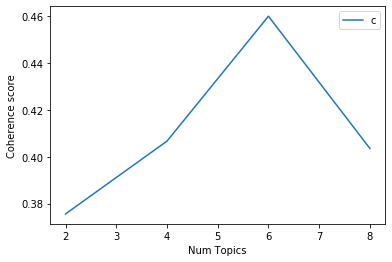

In [37]:
# Show graph

import matplotlib.pyplot as plt

limit=25; start=2#; step=2;
x = range(start, limit)#, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3756
Num Topics = 4  has Coherence Value of 0.4067
Num Topics = 6  has Coherence Value of 0.4599
Num Topics = 8  has Coherence Value of 0.4035


# Most Dominant Topic for each Document

In [43]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[1] where the number of topics is 4

df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[1], corpus=vec_lem_with_tfidf, data=doc_lem)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             0.0                 0.1   
1            1             0.0                 0.1   
2            2             0.0                 0.1   
3            3             0.0                 0.1   
4            4             0.0                 0.1   
5            5             0.0                 0.1   
6            6             0.0                 0.1   
7            7             0.0                 0.1   
8            8             0.0                 0.1   
9            9             0.0                 0.1   

                                            Keywords  \
0  mentioned, containing, Prosecco, Bustop, Yes, ...   
1  mentioned, containing, Prosecco, Bustop, Yes, ...   
2  mentioned, containing, Prosecco, Bustop, Yes, ...   
3  mentioned, containing, Prosecco, Bustop, Yes, ...   
4  mentioned, containing, Prosecco, Bustop, Yes, ...   
5  mentioned, containing, Prosecco, Bustop, Yes, ...   
6  mentioned, containing, Prosecco, Bustop, Yes, ...   
7  mentioned, containing, Prosecco, Bustop, Yes, ...   
8  mentioned, containing, Prosecco, Bustop, Yes, ...   
9  mentioned, containing, Prosecco, Bustop, Yes, ...   

                                                Text  
0  [Have_stayed, I, e, 9yrs, ago, shop, longer, a...  
1  [Personally, would, choose, hotel, closer, ano...  
2              [The, room, great, size, city, hotel]  
3  [The, shower, great, Lovely, old_building, cha...  
4               [The, room, small, bathroom, minute]  
5  [A, bedside, lamp, would, easier, eye, ceiling...  
6  [There, low, level, noise, outside, room, prob...  
7  [conditioning_unit, take, earplug, light, slee...  
8                [The, bar, price, room, small_side]  
9  [Aircon, broken, first, room, work, second, No...

# Save Model

In [ ]:
#Save a model to disk, or reload a pre-trained model
lda_mallet_lem_tfidf=ldamallet #Or you can save the best model, model_list[1] lda_lem_mallet_tfidf

lda_mallet_lem_tfidf.save("lda_mallet_lem_tfidf")

lda_disk=gensim.models.wrappers.LdaMallet.load("lda_mallet_lem_tfidf")